<a href="https://colab.research.google.com/github/tx871217/IndependentStudy_Mango_2/blob/master/mango2_try2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# image preprocessing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 64
input_size = 224
base_dir = "/content/drive/My Drive/mango2_bounding"

training_set = train_datagen.flow_from_directory(base_dir+'/Train',
                                                 target_size=(input_size, input_size),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/Dev',
                                            target_size=(input_size, input_size),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 16415 images belonging to 3 classes.
Found 7000 images belonging to 3 classes.


In [ ]:
import pandas as pd

dev = pd.read_csv("/content/drive/My Drive/C1_P2_Train/dev.csv")
train = pd.read_csv("/content/drive/My Drive/C1_P2_Train/train.csv")

In [ ]:
batch_size=64
input_shape=224

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    fill_mode='nearest',
    shear_range=0.1,
    rescale=1/255,
    brightness_range=[0.5, 1.5])

Using TensorFlow backend.


In [ ]:
train_generator=train_datagen.flow_from_dataframe(train,directory='/content/drive/My Drive/C1_P2_Train/Train/',
                                                      target_size=(224,224),
                                                      x_col="image_id",
                                                      y_col='grade',
                                                      class_mode='categorical',
                                                      shuffle=False,
                                                       subset='training',
                                                      batch_size=batch_size)

Found 44992 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 8 invalid image filename(s) in x_col="image_id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
dev_generator=train_datagen.flow_from_dataframe(dev,directory='/content/drive/My Drive/C1_P2_Train/Dev/',
                                                      target_size=(224,224),
                                                      x_col="image_id",
                                                      y_col='grade',
                                                      class_mode='categorical',
                                                      shuffle=False,
                                                       subset='training',
                                                      batch_size=batch_size)

Found 7000 validated image filenames belonging to 3 classes.


In [ ]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import BatchNormalization,GlobalAveragePooling2D,Dense,Dropout
import numpy as np

model = Sequential()

vgg = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

model.add(vgg)
model.add(GlobalAveragePooling2D())
# model.add(BatchNormalization())

model.add(Dense(units = 3, activation = 'softmax'))
model.summary()

80142336/80134624 [==============================] - 8s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 20,025,923
Trainable params: 20,025,923
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

In [ ]:
reduce_lr =  ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 10,
  verbose = 0, mode = "auto", epsilon = 1e-04, cooldown = 0,
  min_lr = 1e-5)

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [ ]:
es = EarlyStopping(monitor = "val_loss" , verbose = 1 , mode = 'min' , patience = 50 )

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
train_num = train_generator.samples
valid_num = dev_generator.samples

history = model.fit(train_generator,
                         steps_per_epoch=train_num//128,
                         validation_data=dev_generator,
                         epochs=20,
                         validation_steps=valid_num//128,
                         callbacks = [reduce_lr,es])

NameError: ignored

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
train_num = training_set.samples
valid_num = valid_set.samples

history = model.fit_generator(training_set,
                         steps_per_epoch=train_num//100,
                         validation_data=valid_set,
                         epochs=40,
                         validation_steps=valid_num//100,
                         callbacks = [reduce_lr,es])

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 72 could not be retrieved. It could be because a worker has died.
  UserWarning)


  2/164 [..............................] - ETA: 2:21:00 - loss: 1.0719 - categorical_accuracy: 0.3359    

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 143 could not be retrieved. It could be because a worker has died.
  UserWarning)


  3/164 [..............................] - ETA: 2:11:47 - loss: 0.9490 - categorical_accuracy: 0.4427

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 222 could not be retrieved. It could be because a worker has died.
  UserWarning)


  4/164 [..............................] - ETA: 2:08:02 - loss: 0.9019 - categorical_accuracy: 0.5078

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


  5/164 [..............................] - ETA: 2:04:37 - loss: 0.8680 - categorical_accuracy: 0.5375

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


  6/164 [>.............................] - ETA: 2:02:26 - loss: 0.8229 - categorical_accuracy: 0.5703

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 190 could not be retrieved. It could be because a worker has died.
  UserWarning)


  7/164 [>.............................] - ETA: 2:00:31 - loss: 0.7902 - categorical_accuracy: 0.5938

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


  8/164 [>.............................] - ETA: 1:59:00 - loss: 0.7762 - categorical_accuracy: 0.5996

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 210 could not be retrieved. It could be because a worker has died.
  UserWarning)


  9/164 [>.............................] - ETA: 1:57:46 - loss: 0.7626 - categorical_accuracy: 0.6181

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 77 could not be retrieved. It could be because a worker has died.
  UserWarning)


 10/164 [>.............................] - ETA: 1:56:11 - loss: 0.7583 - categorical_accuracy: 0.6266

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 216 could not be retrieved. It could be because a worker has died.
  UserWarning)


 11/164 [=>............................] - ETA: 1:54:50 - loss: 0.7459 - categorical_accuracy: 0.6335

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 246 could not be retrieved. It could be because a worker has died.
  UserWarning)


 12/164 [=>............................] - ETA: 1:53:56 - loss: 0.7324 - categorical_accuracy: 0.6419

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 135 could not be retrieved. It could be because a worker has died.
  UserWarning)


 13/164 [=>............................] - ETA: 1:52:52 - loss: 0.7254 - categorical_accuracy: 0.6454

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 66 could not be retrieved. It could be because a worker has died.
  UserWarning)


 14/164 [=>............................] - ETA: 1:51:33 - loss: 0.7182 - categorical_accuracy: 0.6484

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 173 could not be retrieved. It could be because a worker has died.
  UserWarning)


 15/164 [=>............................] - ETA: 1:50:15 - loss: 0.7172 - categorical_accuracy: 0.6448

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 179 could not be retrieved. It could be because a worker has died.
  UserWarning)


 16/164 [=>............................] - ETA: 1:49:19 - loss: 0.7161 - categorical_accuracy: 0.6367

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 102 could not be retrieved. It could be because a worker has died.
  UserWarning)


 17/164 [==>...........................] - ETA: 1:48:30 - loss: 0.7111 - categorical_accuracy: 0.6415

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 78 could not be retrieved. It could be because a worker has died.
  UserWarning)


 18/164 [==>...........................] - ETA: 1:47:58 - loss: 0.7073 - categorical_accuracy: 0.6432

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


 19/164 [==>...........................] - ETA: 1:47:01 - loss: 0.7027 - categorical_accuracy: 0.6456

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 226 could not be retrieved. It could be because a worker has died.
  UserWarning)


 20/164 [==>...........................] - ETA: 1:46:09 - loss: 0.6989 - categorical_accuracy: 0.6469

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 214 could not be retrieved. It could be because a worker has died.
  UserWarning)


 21/164 [==>...........................] - ETA: 1:47:08 - loss: 0.6975 - categorical_accuracy: 0.6451

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 65 could not be retrieved. It could be because a worker has died.
  UserWarning)


 22/164 [===>..........................] - ETA: 1:46:36 - loss: 0.6964 - categorical_accuracy: 0.6435

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 125 could not be retrieved. It could be because a worker has died.
  UserWarning)


 23/164 [===>..........................] - ETA: 1:45:39 - loss: 0.6946 - categorical_accuracy: 0.6427

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 86 could not be retrieved. It could be because a worker has died.
  UserWarning)


 24/164 [===>..........................] - ETA: 1:44:47 - loss: 0.6934 - categorical_accuracy: 0.6406

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 172 could not be retrieved. It could be because a worker has died.
  UserWarning)


 25/164 [===>..........................] - ETA: 1:43:53 - loss: 0.6928 - categorical_accuracy: 0.6375

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


 26/164 [===>..........................] - ETA: 1:43:01 - loss: 0.6928 - categorical_accuracy: 0.6334

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


 27/164 [===>..........................] - ETA: 1:42:04 - loss: 0.6968 - categorical_accuracy: 0.6354

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 160 could not be retrieved. It could be because a worker has died.
  UserWarning)


 28/164 [====>.........................] - ETA: 1:41:10 - loss: 0.6941 - categorical_accuracy: 0.6384

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 217 could not be retrieved. It could be because a worker has died.
  UserWarning)


 29/164 [====>.........................] - ETA: 1:40:17 - loss: 0.6881 - categorical_accuracy: 0.6439

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 56 could not be retrieved. It could be because a worker has died.
  UserWarning)


 30/164 [====>.........................] - ETA: 1:39:28 - loss: 0.6880 - categorical_accuracy: 0.6448

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 80 could not be retrieved. It could be because a worker has died.
  UserWarning)


 31/164 [====>.........................] - ETA: 1:38:30 - loss: 0.6847 - categorical_accuracy: 0.6482

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


 32/164 [====>.........................] - ETA: 1:37:38 - loss: 0.6840 - categorical_accuracy: 0.6489

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 69 could not be retrieved. It could be because a worker has died.
  UserWarning)


 33/164 [=====>........................] - ETA: 1:36:48 - loss: 0.6826 - categorical_accuracy: 0.6496

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 206 could not be retrieved. It could be because a worker has died.
  UserWarning)


 34/164 [=====>........................] - ETA: 1:35:54 - loss: 0.6790 - categorical_accuracy: 0.6526

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 42 could not be retrieved. It could be because a worker has died.
  UserWarning)


 35/164 [=====>........................] - ETA: 1:35:03 - loss: 0.6776 - categorical_accuracy: 0.6536

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 60 could not be retrieved. It could be because a worker has died.
  UserWarning)


 36/164 [=====>........................] - ETA: 1:34:15 - loss: 0.6764 - categorical_accuracy: 0.6536

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 48 could not be retrieved. It could be because a worker has died.
  UserWarning)


 37/164 [=====>........................] - ETA: 1:33:26 - loss: 0.6759 - categorical_accuracy: 0.6537

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 238 could not be retrieved. It could be because a worker has died.
  UserWarning)


 38/164 [=====>........................] - ETA: 1:32:35 - loss: 0.6746 - categorical_accuracy: 0.6546

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 169 could not be retrieved. It could be because a worker has died.
  UserWarning)


 39/164 [======>.......................] - ETA: 1:31:49 - loss: 0.6695 - categorical_accuracy: 0.6595

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 232 could not be retrieved. It could be because a worker has died.
  UserWarning)


 40/164 [======>.......................] - ETA: 1:31:02 - loss: 0.6739 - categorical_accuracy: 0.6586

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 41/164 [======>.......................] - ETA: 1:30:12 - loss: 0.6733 - categorical_accuracy: 0.6620

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 34 could not be retrieved. It could be because a worker has died.
  UserWarning)


 42/164 [======>.......................] - ETA: 1:29:23 - loss: 0.6758 - categorical_accuracy: 0.6618

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 240 could not be retrieved. It could be because a worker has died.
  UserWarning)


 43/164 [======>.......................] - ETA: 1:28:33 - loss: 0.6746 - categorical_accuracy: 0.6624

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 218 could not be retrieved. It could be because a worker has died.
  UserWarning)


 44/164 [=======>......................] - ETA: 1:27:44 - loss: 0.6736 - categorical_accuracy: 0.6626

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 224 could not be retrieved. It could be because a worker has died.
  UserWarning)


 45/164 [=======>......................] - ETA: 1:26:54 - loss: 0.6709 - categorical_accuracy: 0.6653

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 188 could not be retrieved. It could be because a worker has died.
  UserWarning)


 46/164 [=======>......................] - ETA: 1:26:09 - loss: 0.6723 - categorical_accuracy: 0.6644

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 165 could not be retrieved. It could be because a worker has died.
  UserWarning)


 47/164 [=======>......................] - ETA: 1:25:23 - loss: 0.6715 - categorical_accuracy: 0.6646

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 58 could not be retrieved. It could be because a worker has died.
  UserWarning)


 48/164 [=======>......................] - ETA: 1:24:35 - loss: 0.6710 - categorical_accuracy: 0.6644

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 97 could not be retrieved. It could be because a worker has died.
  UserWarning)


 49/164 [=======>......................] - ETA: 1:23:46 - loss: 0.6709 - categorical_accuracy: 0.6629

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 219 could not be retrieved. It could be because a worker has died.
  UserWarning)


 50/164 [========>.....................] - ETA: 1:23:02 - loss: 0.6698 - categorical_accuracy: 0.6656

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 250 could not be retrieved. It could be because a worker has died.
  UserWarning)


 51/164 [========>.....................] - ETA: 1:22:13 - loss: 0.6738 - categorical_accuracy: 0.6639

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 46 could not be retrieved. It could be because a worker has died.
  UserWarning)


 52/164 [========>.....................] - ETA: 1:21:23 - loss: 0.6736 - categorical_accuracy: 0.6653

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 156 could not be retrieved. It could be because a worker has died.
  UserWarning)


 53/164 [========>.....................] - ETA: 1:20:38 - loss: 0.6749 - categorical_accuracy: 0.6630

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 166 could not be retrieved. It could be because a worker has died.
  UserWarning)


 54/164 [========>.....................] - ETA: 1:19:52 - loss: 0.6749 - categorical_accuracy: 0.6635

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 54 could not be retrieved. It could be because a worker has died.
  UserWarning)


 55/164 [=========>....................] - ETA: 1:19:09 - loss: 0.6736 - categorical_accuracy: 0.6642

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


 56/164 [=========>....................] - ETA: 1:18:21 - loss: 0.6720 - categorical_accuracy: 0.6652

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 133 could not be retrieved. It could be because a worker has died.
  UserWarning)


 57/164 [=========>....................] - ETA: 1:18:12 - loss: 0.6707 - categorical_accuracy: 0.6658

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 109 could not be retrieved. It could be because a worker has died.
  UserWarning)


 58/164 [=========>....................] - ETA: 1:17:28 - loss: 0.6704 - categorical_accuracy: 0.6654

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 32 could not be retrieved. It could be because a worker has died.
  UserWarning)


 59/164 [=========>....................] - ETA: 1:16:48 - loss: 0.6694 - categorical_accuracy: 0.6660

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 110 could not be retrieved. It could be because a worker has died.
  UserWarning)


 60/164 [=========>....................] - ETA: 1:16:02 - loss: 0.6683 - categorical_accuracy: 0.6661

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 229 could not be retrieved. It could be because a worker has died.
  UserWarning)


 61/164 [==========>...................] - ETA: 1:15:16 - loss: 0.6677 - categorical_accuracy: 0.6652

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


 62/164 [==========>...................] - ETA: 1:14:29 - loss: 0.6665 - categorical_accuracy: 0.6671

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


 63/164 [==========>...................] - ETA: 1:13:43 - loss: 0.6662 - categorical_accuracy: 0.6677

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 144 could not be retrieved. It could be because a worker has died.
  UserWarning)


 64/164 [==========>...................] - ETA: 1:12:56 - loss: 0.6649 - categorical_accuracy: 0.6685

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 220 could not be retrieved. It could be because a worker has died.
  UserWarning)


 65/164 [==========>...................] - ETA: 1:12:11 - loss: 0.6634 - categorical_accuracy: 0.6692

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 236 could not be retrieved. It could be because a worker has died.
  UserWarning)


 66/164 [===========>..................] - ETA: 1:11:27 - loss: 0.6638 - categorical_accuracy: 0.6681

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 209 could not be retrieved. It could be because a worker has died.
  UserWarning)


 67/164 [===========>..................] - ETA: 1:10:41 - loss: 0.6637 - categorical_accuracy: 0.6688

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 147 could not be retrieved. It could be because a worker has died.
  UserWarning)


 68/164 [===========>..................] - ETA: 1:09:56 - loss: 0.6673 - categorical_accuracy: 0.6675

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 84 could not be retrieved. It could be because a worker has died.
  UserWarning)


 69/164 [===========>..................] - ETA: 1:09:11 - loss: 0.6674 - categorical_accuracy: 0.6676

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 183 could not be retrieved. It could be because a worker has died.
  UserWarning)


 70/164 [===========>..................] - ETA: 1:08:27 - loss: 0.6680 - categorical_accuracy: 0.6667

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 145 could not be retrieved. It could be because a worker has died.
  UserWarning)


 71/164 [===========>..................] - ETA: 1:09:15 - loss: 0.6677 - categorical_accuracy: 0.6664

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 70 could not be retrieved. It could be because a worker has died.
  UserWarning)


 72/164 [============>.................] - ETA: 1:08:32 - loss: 0.6673 - categorical_accuracy: 0.6658

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 116 could not be retrieved. It could be because a worker has died.
  UserWarning)


 73/164 [============>.................] - ETA: 1:07:46 - loss: 0.6661 - categorical_accuracy: 0.6670

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 146 could not be retrieved. It could be because a worker has died.
  UserWarning)


 74/164 [============>.................] - ETA: 1:07:02 - loss: 0.6664 - categorical_accuracy: 0.6664

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


 75/164 [============>.................] - ETA: 1:06:15 - loss: 0.6657 - categorical_accuracy: 0.6665

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 137 could not be retrieved. It could be because a worker has died.
  UserWarning)


 76/164 [============>.................] - ETA: 1:05:31 - loss: 0.6658 - categorical_accuracy: 0.6653

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 171 could not be retrieved. It could be because a worker has died.
  UserWarning)


 77/164 [=============>................] - ETA: 1:04:46 - loss: 0.6658 - categorical_accuracy: 0.6652

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 35 could not be retrieved. It could be because a worker has died.
  UserWarning)


 78/164 [=============>................] - ETA: 1:03:59 - loss: 0.6647 - categorical_accuracy: 0.6659

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 142 could not be retrieved. It could be because a worker has died.
  UserWarning)


 79/164 [=============>................] - ETA: 1:03:12 - loss: 0.6638 - categorical_accuracy: 0.6663

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 124 could not be retrieved. It could be because a worker has died.
  UserWarning)


 80/164 [=============>................] - ETA: 1:02:26 - loss: 0.6626 - categorical_accuracy: 0.6670

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 62 could not be retrieved. It could be because a worker has died.
  UserWarning)


 81/164 [=============>................] - ETA: 1:01:42 - loss: 0.6615 - categorical_accuracy: 0.6676

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 43 could not be retrieved. It could be because a worker has died.
  UserWarning)


 82/164 [==============>...............] - ETA: 1:00:57 - loss: 0.6613 - categorical_accuracy: 0.6671

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 223 could not be retrieved. It could be because a worker has died.
  UserWarning)


 83/164 [==============>...............] - ETA: 1:00:10 - loss: 0.6604 - categorical_accuracy: 0.6685

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 150 could not be retrieved. It could be because a worker has died.
  UserWarning)


 84/164 [==============>...............] - ETA: 59:26 - loss: 0.6626 - categorical_accuracy: 0.6678  

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)


 85/164 [==============>...............] - ETA: 58:38 - loss: 0.6627 - categorical_accuracy: 0.6673

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 95 could not be retrieved. It could be because a worker has died.
  UserWarning)


 86/164 [==============>...............] - ETA: 57:51 - loss: 0.6621 - categorical_accuracy: 0.6675

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 197 could not be retrieved. It could be because a worker has died.
  UserWarning)


 87/164 [==============>...............] - ETA: 57:05 - loss: 0.6615 - categorical_accuracy: 0.6676

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 140 could not be retrieved. It could be because a worker has died.
  UserWarning)


 88/164 [===============>..............] - ETA: 56:18 - loss: 0.6614 - categorical_accuracy: 0.6671

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 155 could not be retrieved. It could be because a worker has died.
  UserWarning)


 89/164 [===============>..............] - ETA: 55:30 - loss: 0.6604 - categorical_accuracy: 0.6678

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 208 could not be retrieved. It could be because a worker has died.
  UserWarning)


 90/164 [===============>..............] - ETA: 54:44 - loss: 0.6600 - categorical_accuracy: 0.6679

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 138 could not be retrieved. It could be because a worker has died.
  UserWarning)


 91/164 [===============>..............] - ETA: 53:59 - loss: 0.6592 - categorical_accuracy: 0.6679

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 182 could not be retrieved. It could be because a worker has died.
  UserWarning)


 92/164 [===============>..............] - ETA: 53:13 - loss: 0.6588 - categorical_accuracy: 0.6676

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 113 could not be retrieved. It could be because a worker has died.
  UserWarning)


 93/164 [================>.............] - ETA: 53:05 - loss: 0.6578 - categorical_accuracy: 0.6683

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 189 could not be retrieved. It could be because a worker has died.
  UserWarning)


 94/164 [================>.............] - ETA: 52:19 - loss: 0.6572 - categorical_accuracy: 0.6686

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 63 could not be retrieved. It could be because a worker has died.
  UserWarning)


 95/164 [================>.............] - ETA: 51:32 - loss: 0.6560 - categorical_accuracy: 0.6696

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 193 could not be retrieved. It could be because a worker has died.
  UserWarning)


 96/164 [================>.............] - ETA: 50:50 - loss: 0.6552 - categorical_accuracy: 0.6701

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 215 could not be retrieved. It could be because a worker has died.
  UserWarning)


 97/164 [================>.............] - ETA: 50:05 - loss: 0.6543 - categorical_accuracy: 0.6701

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 50 could not be retrieved. It could be because a worker has died.
  UserWarning)


 98/164 [================>.............] - ETA: 49:17 - loss: 0.6553 - categorical_accuracy: 0.6684

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 128 could not be retrieved. It could be because a worker has died.
  UserWarning)


 99/164 [=================>............] - ETA: 48:31 - loss: 0.6584 - categorical_accuracy: 0.6656

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 79 could not be retrieved. It could be because a worker has died.
  UserWarning)


100/164 [=================>............] - ETA: 47:45 - loss: 0.6590 - categorical_accuracy: 0.6656

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 212 could not be retrieved. It could be because a worker has died.
  UserWarning)


101/164 [=================>............] - ETA: 46:59 - loss: 0.6583 - categorical_accuracy: 0.6660

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


102/164 [=================>............] - ETA: 46:13 - loss: 0.6571 - categorical_accuracy: 0.6670

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 96 could not be retrieved. It could be because a worker has died.
  UserWarning)


103/164 [=================>............] - ETA: 45:27 - loss: 0.6567 - categorical_accuracy: 0.6673

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 227 could not be retrieved. It could be because a worker has died.
  UserWarning)


104/164 [==================>...........] - ETA: 44:41 - loss: 0.6558 - categorical_accuracy: 0.6680

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 234 could not be retrieved. It could be because a worker has died.
  UserWarning)


105/164 [==================>...........] - ETA: 43:57 - loss: 0.6547 - categorical_accuracy: 0.6687

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 49 could not be retrieved. It could be because a worker has died.
  UserWarning)


106/164 [==================>...........] - ETA: 43:11 - loss: 0.6545 - categorical_accuracy: 0.6688

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 37 could not be retrieved. It could be because a worker has died.
  UserWarning)


107/164 [==================>...........] - ETA: 42:25 - loss: 0.6539 - categorical_accuracy: 0.6688

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 115 could not be retrieved. It could be because a worker has died.
  UserWarning)


108/164 [==================>...........] - ETA: 41:41 - loss: 0.6526 - categorical_accuracy: 0.6698

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 185 could not be retrieved. It could be because a worker has died.
  UserWarning)


109/164 [==================>...........] - ETA: 40:58 - loss: 0.6510 - categorical_accuracy: 0.6710

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 36 could not be retrieved. It could be because a worker has died.
  UserWarning)


110/164 [===================>..........] - ETA: 40:12 - loss: 0.6515 - categorical_accuracy: 0.6705

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 225 could not be retrieved. It could be because a worker has died.
  UserWarning)


111/164 [===================>..........] - ETA: 39:27 - loss: 0.6513 - categorical_accuracy: 0.6707

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 47 could not be retrieved. It could be because a worker has died.
  UserWarning)


112/164 [===================>..........] - ETA: 38:41 - loss: 0.6530 - categorical_accuracy: 0.6696

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 57 could not be retrieved. It could be because a worker has died.
  UserWarning)


113/164 [===================>..........] - ETA: 37:57 - loss: 0.6532 - categorical_accuracy: 0.6684

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 161 could not be retrieved. It could be because a worker has died.
  UserWarning)


114/164 [===================>..........] - ETA: 37:10 - loss: 0.6526 - categorical_accuracy: 0.6689

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 73 could not be retrieved. It could be because a worker has died.
  UserWarning)


115/164 [====================>.........] - ETA: 36:24 - loss: 0.6521 - categorical_accuracy: 0.6687

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


116/164 [====================>.........] - ETA: 35:38 - loss: 0.6515 - categorical_accuracy: 0.6690

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 55 could not be retrieved. It could be because a worker has died.
  UserWarning)


117/164 [====================>.........] - ETA: 34:52 - loss: 0.6514 - categorical_accuracy: 0.6685

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


118/164 [====================>.........] - ETA: 34:10 - loss: 0.6511 - categorical_accuracy: 0.6688

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 181 could not be retrieved. It could be because a worker has died.
  UserWarning)


119/164 [====================>.........] - ETA: 33:26 - loss: 0.6503 - categorical_accuracy: 0.6692

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 112 could not be retrieved. It could be because a worker has died.
  UserWarning)


120/164 [====================>.........] - ETA: 32:41 - loss: 0.6490 - categorical_accuracy: 0.6702

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 33 could not be retrieved. It could be because a worker has died.
  UserWarning)


121/164 [=====================>........] - ETA: 31:56 - loss: 0.6487 - categorical_accuracy: 0.6702

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 93 could not be retrieved. It could be because a worker has died.
  UserWarning)


122/164 [=====================>........] - ETA: 31:11 - loss: 0.6480 - categorical_accuracy: 0.6709

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 152 could not be retrieved. It could be because a worker has died.
  UserWarning)


123/164 [=====================>........] - ETA: 30:26 - loss: 0.6473 - categorical_accuracy: 0.6710

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 89 could not be retrieved. It could be because a worker has died.
  UserWarning)


124/164 [=====================>........] - ETA: 29:41 - loss: 0.6463 - categorical_accuracy: 0.6719

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 200 could not be retrieved. It could be because a worker has died.
  UserWarning)


125/164 [=====================>........] - ETA: 28:55 - loss: 0.6465 - categorical_accuracy: 0.6721

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 157 could not be retrieved. It could be because a worker has died.
  UserWarning)


126/164 [======================>.......] - ETA: 28:10 - loss: 0.6462 - categorical_accuracy: 0.6725

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 90 could not be retrieved. It could be because a worker has died.
  UserWarning)


127/164 [======================>.......] - ETA: 27:25 - loss: 0.6458 - categorical_accuracy: 0.6727

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 254 could not be retrieved. It could be because a worker has died.
  UserWarning)


128/164 [======================>.......] - ETA: 26:40 - loss: 0.6454 - categorical_accuracy: 0.6730

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 130 could not be retrieved. It could be because a worker has died.
  UserWarning)


129/164 [======================>.......] - ETA: 25:55 - loss: 0.6446 - categorical_accuracy: 0.6736

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 159 could not be retrieved. It could be because a worker has died.
  UserWarning)


130/164 [======================>.......] - ETA: 25:10 - loss: 0.6438 - categorical_accuracy: 0.6739

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 100 could not be retrieved. It could be because a worker has died.
  UserWarning)


131/164 [======================>.......] - ETA: 24:25 - loss: 0.6432 - categorical_accuracy: 0.6740

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 68 could not be retrieved. It could be because a worker has died.
  UserWarning)


132/164 [=======================>......] - ETA: 23:40 - loss: 0.6429 - categorical_accuracy: 0.6740

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 205 could not be retrieved. It could be because a worker has died.
  UserWarning)


133/164 [=======================>......] - ETA: 22:55 - loss: 0.6422 - categorical_accuracy: 0.6743

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 87 could not be retrieved. It could be because a worker has died.
  UserWarning)


134/164 [=======================>......] - ETA: 22:11 - loss: 0.6415 - categorical_accuracy: 0.6750

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 98 could not be retrieved. It could be because a worker has died.
  UserWarning)


135/164 [=======================>......] - ETA: 21:26 - loss: 0.6404 - categorical_accuracy: 0.6756

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 76 could not be retrieved. It could be because a worker has died.
  UserWarning)


136/164 [=======================>......] - ETA: 20:41 - loss: 0.6394 - categorical_accuracy: 0.6760

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


137/164 [========================>.....] - ETA: 19:56 - loss: 0.6390 - categorical_accuracy: 0.6759

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 91 could not be retrieved. It could be because a worker has died.
  UserWarning)


138/164 [========================>.....] - ETA: 19:12 - loss: 0.6382 - categorical_accuracy: 0.6765

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 243 could not be retrieved. It could be because a worker has died.
  UserWarning)


139/164 [========================>.....] - ETA: 18:27 - loss: 0.6376 - categorical_accuracy: 0.6766

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 237 could not be retrieved. It could be because a worker has died.
  UserWarning)


140/164 [========================>.....] - ETA: 17:42 - loss: 0.6369 - categorical_accuracy: 0.6775

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 149 could not be retrieved. It could be because a worker has died.
  UserWarning)


141/164 [========================>.....] - ETA: 16:57 - loss: 0.6362 - categorical_accuracy: 0.6782

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 59 could not be retrieved. It could be because a worker has died.
  UserWarning)


142/164 [========================>.....] - ETA: 16:13 - loss: 0.6357 - categorical_accuracy: 0.6786

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 83 could not be retrieved. It could be because a worker has died.
  UserWarning)


143/164 [=========================>....] - ETA: 15:28 - loss: 0.6357 - categorical_accuracy: 0.6782

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 162 could not be retrieved. It could be because a worker has died.
  UserWarning)


144/164 [=========================>....] - ETA: 14:44 - loss: 0.6356 - categorical_accuracy: 0.6787

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 253 could not be retrieved. It could be because a worker has died.
  UserWarning)


145/164 [=========================>....] - ETA: 14:00 - loss: 0.6348 - categorical_accuracy: 0.6795

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 163 could not be retrieved. It could be because a worker has died.
  UserWarning)


146/164 [=========================>....] - ETA: 13:15 - loss: 0.6342 - categorical_accuracy: 0.6795

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 119 could not be retrieved. It could be because a worker has died.
  UserWarning)


147/164 [=========================>....] - ETA: 12:31 - loss: 0.6339 - categorical_accuracy: 0.6800

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 82 could not be retrieved. It could be because a worker has died.
  UserWarning)


148/164 [==========================>...] - ETA: 11:46 - loss: 0.6328 - categorical_accuracy: 0.6806

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 213 could not be retrieved. It could be because a worker has died.
  UserWarning)


149/164 [==========================>...] - ETA: 11:02 - loss: 0.6325 - categorical_accuracy: 0.6808

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 41 could not be retrieved. It could be because a worker has died.
  UserWarning)


150/164 [==========================>...] - ETA: 10:18 - loss: 0.6330 - categorical_accuracy: 0.6792

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 117 could not be retrieved. It could be because a worker has died.
  UserWarning)


151/164 [==========================>...] - ETA: 9:34 - loss: 0.6351 - categorical_accuracy: 0.6785 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 187 could not be retrieved. It could be because a worker has died.
  UserWarning)


152/164 [==========================>...] - ETA: 8:49 - loss: 0.6354 - categorical_accuracy: 0.6776

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 204 could not be retrieved. It could be because a worker has died.
  UserWarning)


153/164 [==========================>...] - ETA: 8:05 - loss: 0.6358 - categorical_accuracy: 0.6766

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 186 could not be retrieved. It could be because a worker has died.
  UserWarning)


154/164 [===========================>..] - ETA: 7:21 - loss: 0.6360 - categorical_accuracy: 0.6759

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 105 could not be retrieved. It could be because a worker has died.
  UserWarning)


155/164 [===========================>..] - ETA: 6:37 - loss: 0.6361 - categorical_accuracy: 0.6758

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 153 could not be retrieved. It could be because a worker has died.
  UserWarning)


156/164 [===========================>..] - ETA: 5:53 - loss: 0.6359 - categorical_accuracy: 0.6757

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 85 could not be retrieved. It could be because a worker has died.
  UserWarning)


157/164 [===========================>..] - ETA: 5:09 - loss: 0.6357 - categorical_accuracy: 0.6758

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 123 could not be retrieved. It could be because a worker has died.
  UserWarning)


158/164 [===========================>..] - ETA: 4:24 - loss: 0.6352 - categorical_accuracy: 0.6755

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 168 could not be retrieved. It could be because a worker has died.
  UserWarning)


159/164 [============================>.] - ETA: 3:40 - loss: 0.6347 - categorical_accuracy: 0.6761

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 151 could not be retrieved. It could be because a worker has died.
  UserWarning)


160/164 [============================>.] - ETA: 2:56 - loss: 0.6349 - categorical_accuracy: 0.6758

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


161/164 [============================>.] - ETA: 2:12 - loss: 0.6346 - categorical_accuracy: 0.6761

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 99 could not be retrieved. It could be because a worker has died.
  UserWarning)


162/164 [============================>.] - ETA: 1:28 - loss: 0.6342 - categorical_accuracy: 0.6762

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


163/164 [============================>.] - ETA: 44s - loss: 0.6332 - categorical_accuracy: 0.6769 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 202 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could 

164/164 [==============================] - 9514s 58s/step - loss: 0.6328 - categorical_accuracy: 0.6773 - val_loss: 4.6757 - val_categorical_accuracy: 0.1768
Epoch 2/40
 11/164 [=>............................] - ETA: 2:45 - loss: 0.6010 - categorical_accuracy: 0.6989

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 247 could not be retrieved. It could be because a worker has died.
  UserWarning)


 12/164 [=>............................] - ETA: 12:56 - loss: 0.6074 - categorical_accuracy: 0.6940

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 241 could not be retrieved. It could be because a worker has died.
  UserWarning)


 13/164 [=>............................] - ETA: 20:40 - loss: 0.6109 - categorical_accuracy: 0.6899

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 129 could not be retrieved. It could be because a worker has died.
  UserWarning)


 14/164 [=>............................] - ETA: 26:39 - loss: 0.6244 - categorical_accuracy: 0.6853

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 252 could not be retrieved. It could be because a worker has died.
  UserWarning)


 15/164 [=>............................] - ETA: 31:52 - loss: 0.6214 - categorical_accuracy: 0.6906

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 92 could not be retrieved. It could be because a worker has died.
  UserWarning)


 17/164 [==>...........................] - ETA: 40:04 - loss: 0.6145 - categorical_accuracy: 0.6921

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


 18/164 [==>...........................] - ETA: 43:27 - loss: 0.6069 - categorical_accuracy: 0.6970

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 221 could not be retrieved. It could be because a worker has died.
  UserWarning)


 21/164 [==>...........................] - ETA: 48:31 - loss: 0.5958 - categorical_accuracy: 0.7048

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 191 could not be retrieved. It could be because a worker has died.
  UserWarning)


 22/164 [===>..........................] - ETA: 50:39 - loss: 0.5937 - categorical_accuracy: 0.7098

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 228 could not be retrieved. It could be because a worker has died.
  UserWarning)


 23/164 [===>..........................] - ETA: 52:37 - loss: 0.5957 - categorical_accuracy: 0.7088

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 235 could not be retrieved. It could be because a worker has died.
  UserWarning)


 24/164 [===>..........................] - ETA: 54:08 - loss: 0.5983 - categorical_accuracy: 0.7053

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 126 could not be retrieved. It could be because a worker has died.
  UserWarning)


 25/164 [===>..........................] - ETA: 55:34 - loss: 0.5959 - categorical_accuracy: 0.7084

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 180 could not be retrieved. It could be because a worker has died.
  UserWarning)


 27/164 [===>..........................] - ETA: 58:06 - loss: 0.5859 - categorical_accuracy: 0.7133

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 248 could not be retrieved. It could be because a worker has died.
  UserWarning)


 30/164 [====>.........................] - ETA: 1:00:41 - loss: 0.5841 - categorical_accuracy: 0.7144

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 177 could not be retrieved. It could be because a worker has died.
  UserWarning)


 31/164 [====>.........................] - ETA: 1:01:51 - loss: 0.5851 - categorical_accuracy: 0.7135

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 203 could not be retrieved. It could be because a worker has died.
  UserWarning)


 33/164 [=====>........................] - ETA: 1:03:00 - loss: 0.5849 - categorical_accuracy: 0.7148

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 103 could not be retrieved. It could be because a worker has died.
  UserWarning)


 34/164 [=====>........................] - ETA: 1:03:24 - loss: 0.5854 - categorical_accuracy: 0.7130

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 71 could not be retrieved. It could be because a worker has died.
  UserWarning)


 35/164 [=====>........................] - ETA: 1:03:47 - loss: 0.5847 - categorical_accuracy: 0.7123

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 104 could not be retrieved. It could be because a worker has died.
  UserWarning)


 36/164 [=====>........................] - ETA: 1:04:09 - loss: 0.5864 - categorical_accuracy: 0.7107

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 198 could not be retrieved. It could be because a worker has died.
  UserWarning)


 37/164 [=====>........................] - ETA: 1:04:23 - loss: 0.5849 - categorical_accuracy: 0.7118

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 134 could not be retrieved. It could be because a worker has died.
  UserWarning)


 38/164 [=====>........................] - ETA: 1:04:32 - loss: 0.5845 - categorical_accuracy: 0.7124

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 176 could not be retrieved. It could be because a worker has died.
  UserWarning)


 39/164 [======>.......................] - ETA: 1:04:35 - loss: 0.5873 - categorical_accuracy: 0.7105

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 164 could not be retrieved. It could be because a worker has died.
  UserWarning)


 40/164 [======>.......................] - ETA: 1:04:34 - loss: 0.5892 - categorical_accuracy: 0.7076

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 245 could not be retrieved. It could be because a worker has died.
  UserWarning)


 41/164 [======>.......................] - ETA: 1:04:29 - loss: 0.5903 - categorical_accuracy: 0.7074

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 139 could not be retrieved. It could be because a worker has died.
  UserWarning)


 43/164 [======>.......................] - ETA: 1:04:29 - loss: 0.5899 - categorical_accuracy: 0.7091

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 94 could not be retrieved. It could be because a worker has died.
  UserWarning)


 44/164 [=======>......................] - ETA: 1:04:24 - loss: 0.5868 - categorical_accuracy: 0.7115

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 81 could not be retrieved. It could be because a worker has died.
  UserWarning)


 46/164 [=======>......................] - ETA: 1:04:09 - loss: 0.5900 - categorical_accuracy: 0.7063

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 194 could not be retrieved. It could be because a worker has died.
  UserWarning)


 47/164 [=======>......................] - ETA: 1:04:12 - loss: 0.5954 - categorical_accuracy: 0.7042

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 249 could not be retrieved. It could be because a worker has died.
  UserWarning)


 48/164 [=======>......................] - ETA: 1:04:27 - loss: 0.5947 - categorical_accuracy: 0.7062

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 141 could not be retrieved. It could be because a worker has died.
  UserWarning)


 49/164 [=======>......................] - ETA: 1:04:16 - loss: 0.5935 - categorical_accuracy: 0.7071

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 148 could not be retrieved. It could be because a worker has died.
  UserWarning)


 51/164 [========>.....................] - ETA: 1:03:45 - loss: 0.5923 - categorical_accuracy: 0.7088

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 158 could not be retrieved. It could be because a worker has died.
  UserWarning)


 53/164 [========>.....................] - ETA: 1:03:31 - loss: 0.5895 - categorical_accuracy: 0.7115

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 255 could not be retrieved. It could be because a worker has died.
  UserWarning)


 54/164 [========>.....................] - ETA: 1:03:32 - loss: 0.5909 - categorical_accuracy: 0.7105

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 131 could not be retrieved. It could be because a worker has died.
  UserWarning)


 55/164 [=========>....................] - ETA: 1:03:25 - loss: 0.5908 - categorical_accuracy: 0.7095

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 127 could not be retrieved. It could be because a worker has died.
  UserWarning)


 56/164 [=========>....................] - ETA: 1:03:31 - loss: 0.5943 - categorical_accuracy: 0.7066

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 211 could not be retrieved. It could be because a worker has died.
  UserWarning)


 57/164 [=========>....................] - ETA: 1:03:11 - loss: 0.5953 - categorical_accuracy: 0.7046

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 207 could not be retrieved. It could be because a worker has died.
  UserWarning)


 58/164 [=========>....................] - ETA: 1:02:50 - loss: 0.5940 - categorical_accuracy: 0.7048

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 120 could not be retrieved. It could be because a worker has died.
  UserWarning)


 59/164 [=========>....................] - ETA: 1:02:27 - loss: 0.5928 - categorical_accuracy: 0.7053

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


 60/164 [=========>....................] - ETA: 1:02:10 - loss: 0.5925 - categorical_accuracy: 0.7048

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 175 could not be retrieved. It could be because a worker has died.
  UserWarning)


 62/164 [==========>...................] - ETA: 1:01:17 - loss: 0.5891 - categorical_accuracy: 0.7072

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 199 could not be retrieved. It could be because a worker has died.
  UserWarning)


 63/164 [==========>...................] - ETA: 1:00:50 - loss: 0.5885 - categorical_accuracy: 0.7067

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 108 could not be retrieved. It could be because a worker has died.
  UserWarning)


 64/164 [==========>...................] - ETA: 1:00:21 - loss: 0.5886 - categorical_accuracy: 0.7061

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 88 could not be retrieved. It could be because a worker has died.
  UserWarning)


 65/164 [==========>...................] - ETA: 59:55 - loss: 0.5861 - categorical_accuracy: 0.7073  

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 75 could not be retrieved. It could be because a worker has died.
  UserWarning)


 66/164 [===========>..................] - ETA: 59:27 - loss: 0.5861 - categorical_accuracy: 0.7070

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


 68/164 [===========>..................] - ETA: 58:40 - loss: 0.5869 - categorical_accuracy: 0.7057

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 170 could not be retrieved. It could be because a worker has died.
  UserWarning)


 69/164 [===========>..................] - ETA: 58:22 - loss: 0.5878 - categorical_accuracy: 0.7041

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 106 could not be retrieved. It could be because a worker has died.
  UserWarning)


 70/164 [===========>..................] - ETA: 57:57 - loss: 0.5875 - categorical_accuracy: 0.7038

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 154 could not be retrieved. It could be because a worker has died.
  UserWarning)


 71/164 [===========>..................] - ETA: 57:32 - loss: 0.5870 - categorical_accuracy: 0.7038

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 244 could not be retrieved. It could be because a worker has died.
  UserWarning)


 72/164 [============>.................] - ETA: 57:12 - loss: 0.5867 - categorical_accuracy: 0.7038

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 122 could not be retrieved. It could be because a worker has died.
  UserWarning)


 75/164 [============>.................] - ETA: 55:55 - loss: 0.5870 - categorical_accuracy: 0.7048

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 101 could not be retrieved. It could be because a worker has died.
  UserWarning)


 76/164 [============>.................] - ETA: 55:22 - loss: 0.5862 - categorical_accuracy: 0.7059

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 233 could not be retrieved. It could be because a worker has died.
  UserWarning)


 77/164 [=============>................] - ETA: 54:49 - loss: 0.5852 - categorical_accuracy: 0.7062

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 242 could not be retrieved. It could be because a worker has died.
  UserWarning)


 78/164 [=============>................] - ETA: 54:15 - loss: 0.5841 - categorical_accuracy: 0.7066

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 118 could not be retrieved. It could be because a worker has died.
  UserWarning)


 79/164 [=============>................] - ETA: 53:43 - loss: 0.5838 - categorical_accuracy: 0.7067

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 132 could not be retrieved. It could be because a worker has died.
  UserWarning)


 80/164 [=============>................] - ETA: 53:08 - loss: 0.5828 - categorical_accuracy: 0.7071

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


 81/164 [=============>................] - ETA: 52:36 - loss: 0.5819 - categorical_accuracy: 0.7080

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 192 could not be retrieved. It could be because a worker has died.
  UserWarning)


 82/164 [==============>...............] - ETA: 52:07 - loss: 0.5820 - categorical_accuracy: 0.7078

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 111 could not be retrieved. It could be because a worker has died.
  UserWarning)


 84/164 [==============>...............] - ETA: 51:00 - loss: 0.5850 - categorical_accuracy: 0.7065

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 107 could not be retrieved. It could be because a worker has died.
  UserWarning)


 85/164 [==============>...............] - ETA: 50:27 - loss: 0.5840 - categorical_accuracy: 0.7069

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 178 could not be retrieved. It could be because a worker has died.
  UserWarning)


 86/164 [==============>...............] - ETA: 49:53 - loss: 0.5830 - categorical_accuracy: 0.7079

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 196 could not be retrieved. It could be because a worker has died.
  UserWarning)


 87/164 [==============>...............] - ETA: 49:18 - loss: 0.5830 - categorical_accuracy: 0.7077

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


 88/164 [===============>..............] - ETA: 48:47 - loss: 0.5814 - categorical_accuracy: 0.7091

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 251 could not be retrieved. It could be because a worker has died.
  UserWarning)


 89/164 [===============>..............] - ETA: 48:12 - loss: 0.5805 - categorical_accuracy: 0.7095

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 136 could not be retrieved. It could be because a worker has died.
  UserWarning)


 90/164 [===============>..............] - ETA: 47:35 - loss: 0.5798 - categorical_accuracy: 0.7100

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 121 could not be retrieved. It could be because a worker has died.
  UserWarning)


 91/164 [===============>..............] - ETA: 46:59 - loss: 0.5794 - categorical_accuracy: 0.7102

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 184 could not be retrieved. It could be because a worker has died.
  UserWarning)


164/164 [==============================] - 4811s 29s/step - loss: 0.5614 - categorical_accuracy: 0.7229 - val_loss: 5.4671 - val_categorical_accuracy: 0.1698
Epoch 3/40
164/164 [==============================] - 253s 2s/step - loss: 0.4802 - categorical_accuracy: 0.7820 - val_loss: 5.1174 - val_categorical_accuracy: 0.1873
Epoch 4/40
164/164 [==============================] - 255s 2s/step - loss: 0.4551 - categorical_accuracy: 0.7983 - val_loss: 4.9777 - val_categorical_accuracy: 0.1827
Epoch 5/40
164/164 [==============================] - 252s 2s/step - loss: 0.4259 - categorical_accuracy: 0.8161 - val_loss: 6.1149 - val_categorical_accuracy: 0.1847
Epoch 6/40
164/164 [==============================] - 252s 2s/step - loss: 0.4005 - categorical_accuracy: 0.8256 - val_loss: 5.9609 - val_categorical_accuracy: 0.1971
Epoch 7/40
164/164 [==============================] - 254s 2s/step - loss: 0.4058 - categorical_accuracy: 0.8232 - val_loss: 5.6307 - val_categorical_accuracy: 0.1860
Epoch 8

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.8092500030994415


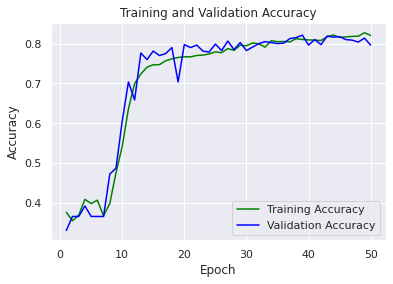

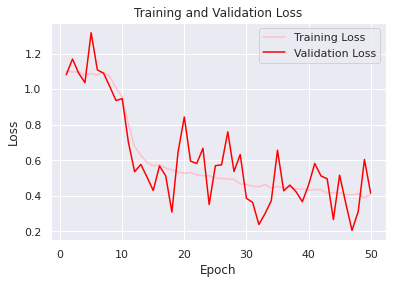

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

x=0
y=0
for i in val_acc[-(len(epochs)//5):]:
  x+=1
  y+=i
print(y/x)
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
